# python analysis


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

##  loading , cleaning and analyzing 

In [ ]:
import pandas as pd


file_names = [
    'dailyActivity_merged.csv', 'dailyCalories_merged.csv', 'dailyIntensities_merged.csv',
    'dailySteps_merged.csv', 'heartrate_seconds_merged.csv', 'hourlyCalories_merged.csv',
    'hourlyIntensities_merged.csv', 'hourlySteps_merged.csv', 'minuteCaloriesNarrow_merged.csv',
    'minuteCaloriesWide_merged.csv', 'minuteIntensitiesNarrow_merged.csv', 'minuteIntensitiesWide_merged.csv',
    'minuteMETsNarrow_merged.csv', 'minuteSleep_merged.csv', 'minuteStepsNarrow_merged.csv',
    'minuteStepsWide_merged.csv', 'sleepDay_merged.csv', 'weightLogInfo_merged.csv'
]


dataframes = {}
for file in file_names:
    df = pd.read_csv(file)
    name = file.replace('.csv', '')
    dataframes[name] = df
    print(f' Loaded: {file} – Shape: {df.shape}')


for name, df in dataframes.items():
    print(f"\n Dataset: {name}")
    print(f" Original Shape: {df.shape}")
    print(f" Null values:\n{df.isnull().sum()}")
    print(f" Duplicates: {df.duplicated().sum()}")
    
  
    df = df.drop_duplicates().dropna()
    dataframes[name] = df
    print(f" Cleaned Shape: {df.shape}")

 Loaded: dailyActivity_merged.csv – Shape: (940, 15)
 Loaded: dailyCalories_merged.csv – Shape: (940, 3)
 Loaded: dailyIntensities_merged.csv – Shape: (940, 10)
 Loaded: dailySteps_merged.csv – Shape: (940, 3)
 Loaded: heartrate_seconds_merged.csv – Shape: (2483658, 3)
 Loaded: hourlyCalories_merged.csv – Shape: (22099, 3)
 Loaded: hourlyIntensities_merged.csv – Shape: (22099, 4)
 Loaded: hourlySteps_merged.csv – Shape: (22099, 3)
 Loaded: minuteCaloriesNarrow_merged.csv – Shape: (1325580, 3)
 Loaded: minuteCaloriesWide_merged.csv – Shape: (21645, 62)
 Loaded: minuteIntensitiesNarrow_merged.csv – Shape: (1325580, 3)
 Loaded: minuteIntensitiesWide_merged.csv – Shape: (21645, 62)
 Loaded: minuteMETsNarrow_merged.csv – Shape: (1325580, 3)
 Loaded: minuteSleep_merged.csv – Shape: (188521, 4)
 Loaded: minuteStepsNarrow_merged.csv – Shape: (1325580, 3)
 Loaded: minuteStepsWide_merged.csv – Shape: (21645, 62)
 Loaded: sleepDay_merged.csv – Shape: (413, 5)
 Loaded: weightLogInfo_merged.csv – S

##  visualization


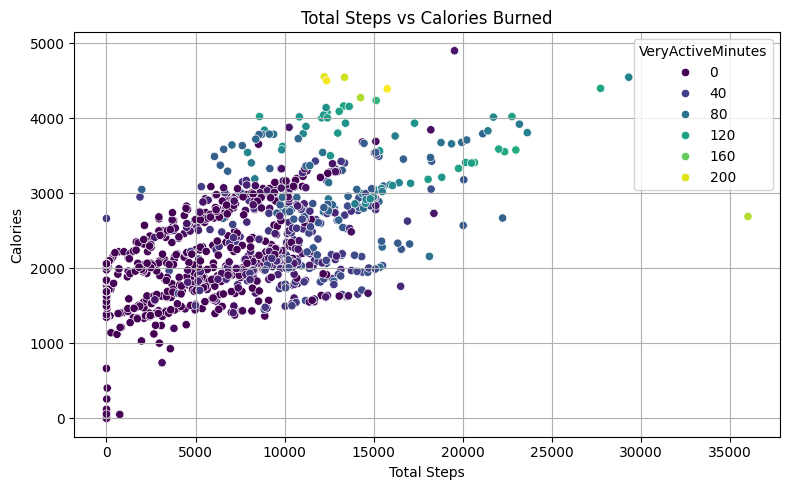

<Figure size 1000x600 with 0 Axes>

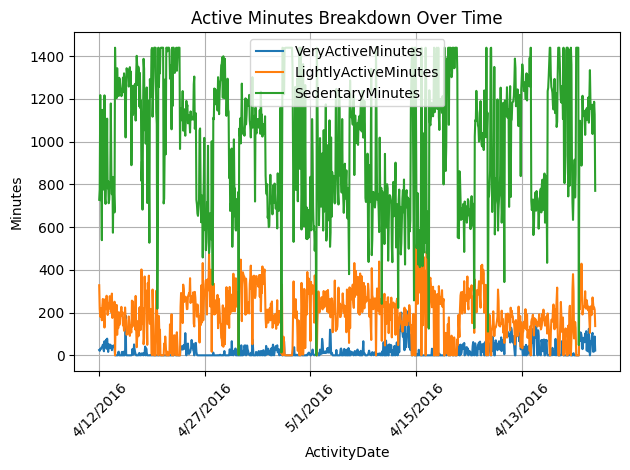

In [7]:
# Daily Activity Dataset
df = dataframes['dailyActivity_merged']

# Scatter plot: Total Steps vs Calories burned
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='TotalSteps', y='Calories', hue='VeryActiveMinutes', palette='viridis')
plt.title('Total Steps vs Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: Steps Breakdown
plt.figure(figsize=(10, 6))
df.set_index('ActivityDate')[['VeryActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']].plot()
plt.title('Active Minutes Breakdown Over Time')
plt.ylabel('Minutes')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

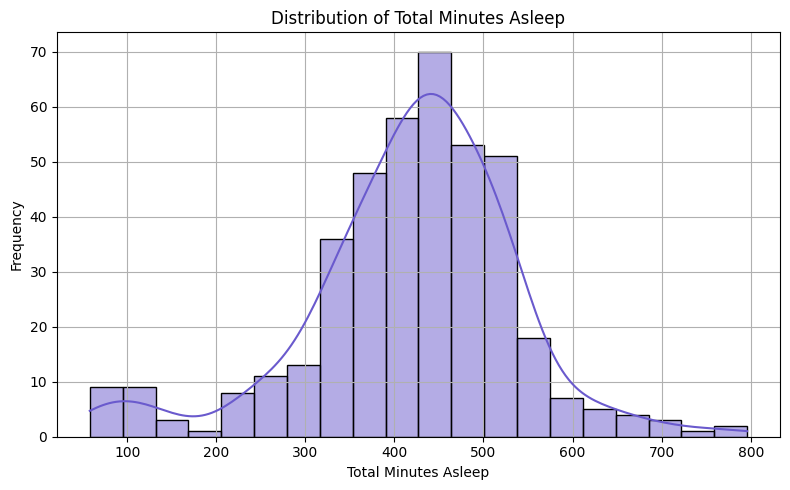

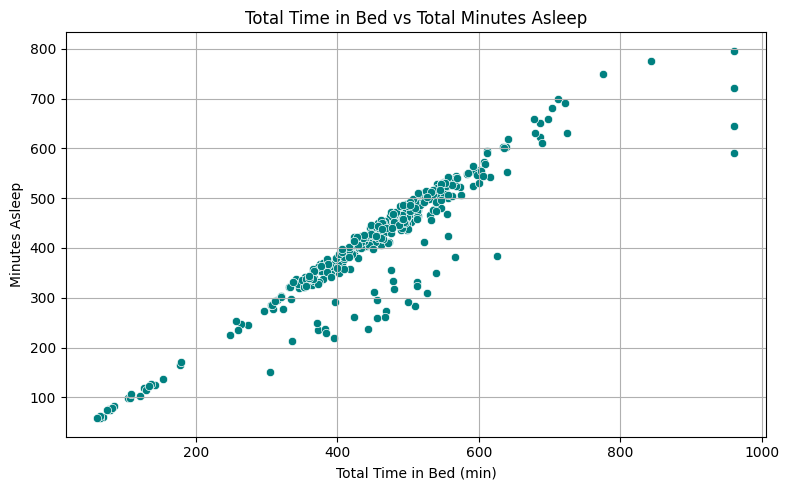

In [8]:
# Sleep Dataset
df = dataframes['sleepDay_merged']

# Histogram: Total Minutes Asleep
plt.figure(figsize=(8, 5))
sns.histplot(df['TotalMinutesAsleep'], kde=True, bins=20, color='slateblue')
plt.title('Distribution of Total Minutes Asleep')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter Plot: Total Time in Bed vs Total Minutes Asleep
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TotalTimeInBed', y='TotalMinutesAsleep', data=df, color='teal')
plt.title('Total Time in Bed vs Total Minutes Asleep')
plt.xlabel('Total Time in Bed (min)')
plt.ylabel('Minutes Asleep')
plt.grid(True)
plt.tight_layout()
plt.show()

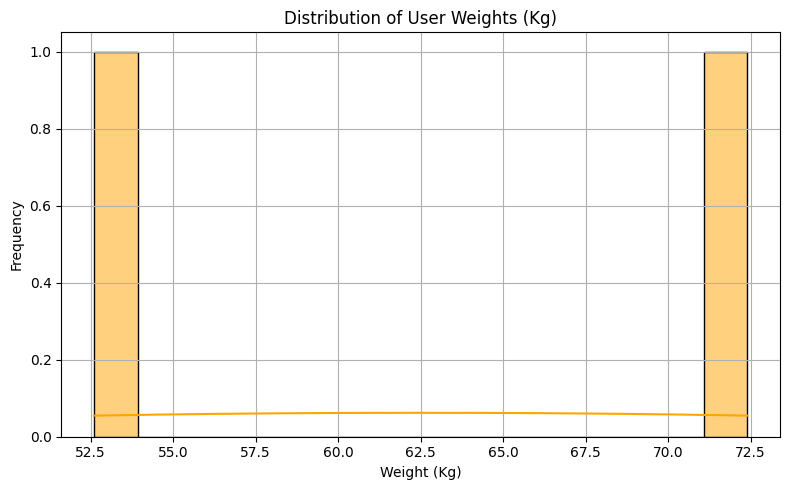

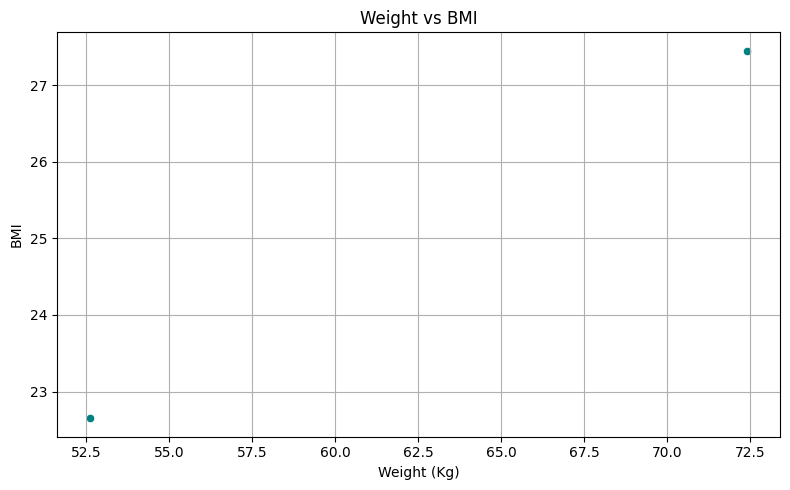

In [10]:
# Weight Log Dataset
df = dataframes['weightLogInfo_merged']

# Histogram: Weight Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['WeightKg'], bins=15, kde=True, color='orange')
plt.title('Distribution of User Weights (Kg)')
plt.xlabel('Weight (Kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Weight vs BMI (without hue)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='WeightKg', y='BMI', color='teal')
plt.title('Weight vs BMI')
plt.xlabel('Weight (Kg)')
plt.ylabel('BMI')
plt.grid(True)
plt.tight_layout()
plt.show()

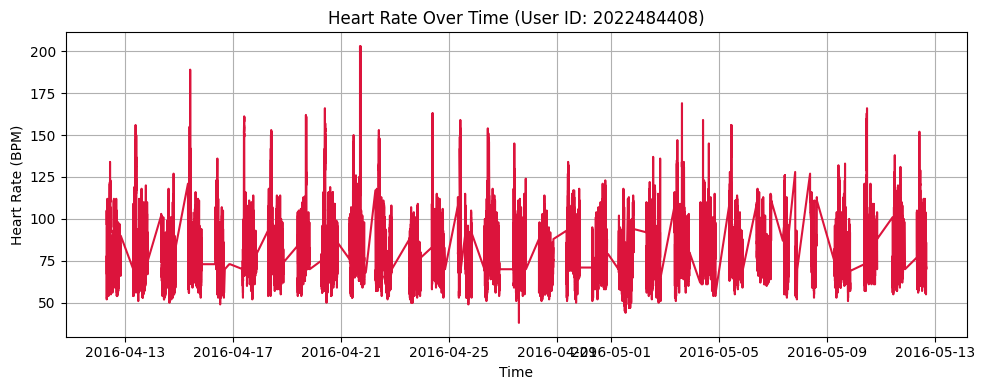

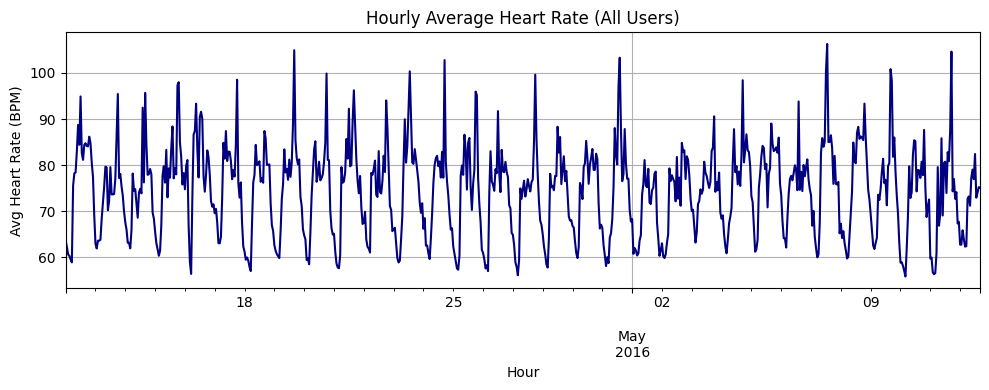

In [11]:
# Heart Rate Dataset
df = dataframes['heartrate_seconds_merged']

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Line Plot: Heart Rate over Time (1 sample user)
sample_user = df['Id'].unique()[0]
sample_data = df[df['Id'] == sample_user]

plt.figure(figsize=(10, 4))
plt.plot(sample_data['Time'], sample_data['Value'], color='crimson')
plt.title(f'Heart Rate Over Time (User ID: {sample_user})')
plt.xlabel('Time')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Aggregated: Average Heart Rate Per Hour (for all users)
df.set_index('Time', inplace=True)
hourly_avg = df['Value'].resample('H').mean()

plt.figure(figsize=(10, 4))
hourly_avg.plot(color='navy')
plt.title('Hourly Average Heart Rate (All Users)')
plt.xlabel('Hour')
plt.ylabel('Avg Heart Rate (BPM)')
plt.grid(True)
plt.tight_layout()
plt.show()

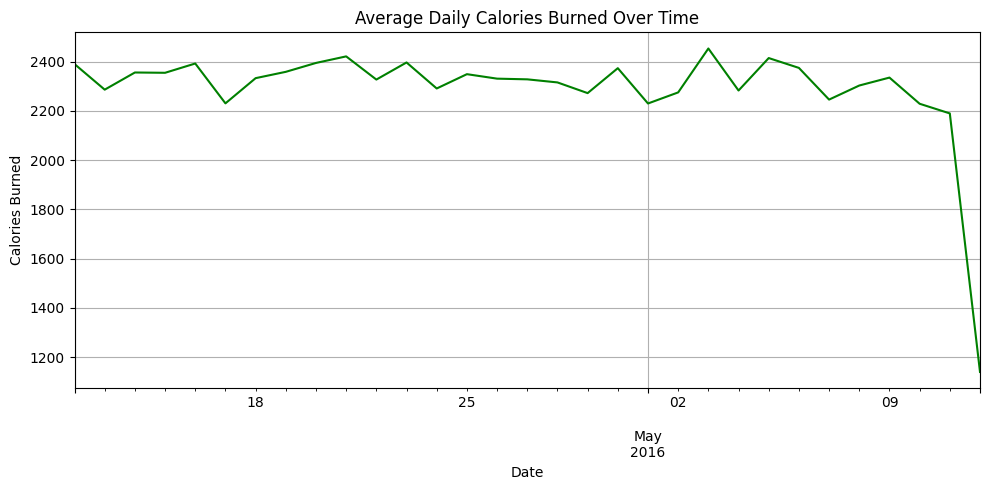

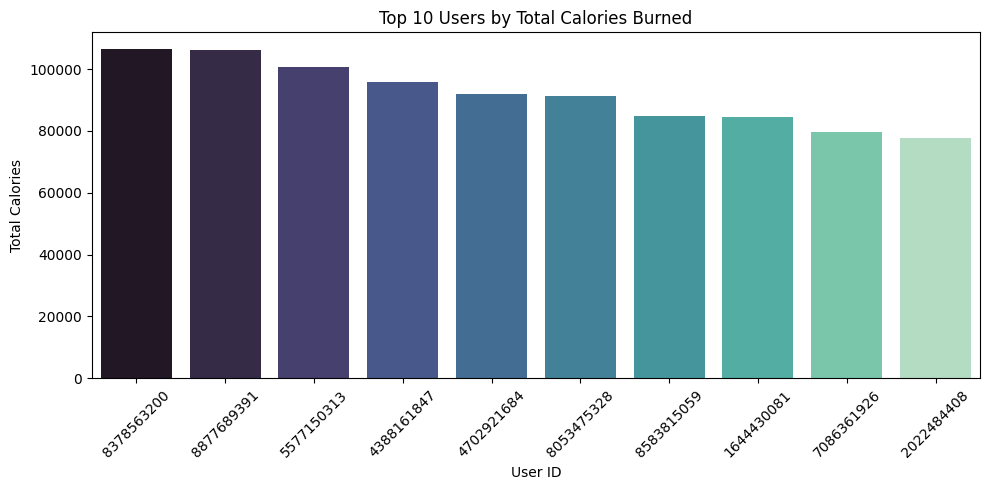

In [12]:
# Daily Calories Dataset
df = dataframes['dailyCalories_merged']

# Convert date column if needed
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

# Line Plot: Calories Burned Over Time (All Users Combined)
df_grouped = df.groupby('ActivityDay')['Calories'].mean()

plt.figure(figsize=(10, 5))
df_grouped.plot(color='green')
plt.title('Average Daily Calories Burned Over Time')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Plot: Top 10 Users by Total Calories Burned
user_totals = df.groupby('Id')['Calories'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=user_totals.index.astype(str), y=user_totals.values, palette='mako')
plt.title('Top 10 Users by Total Calories Burned')
plt.xlabel('User ID')
plt.ylabel('Total Calories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

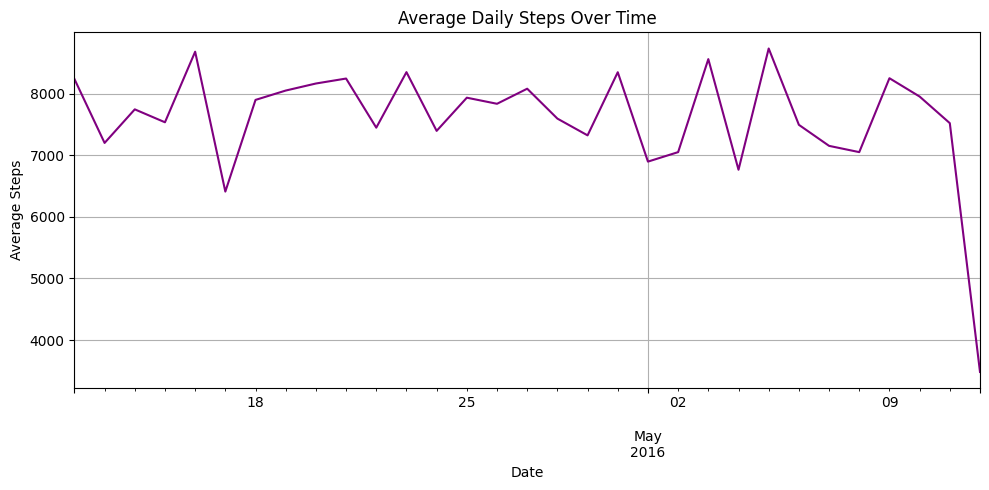

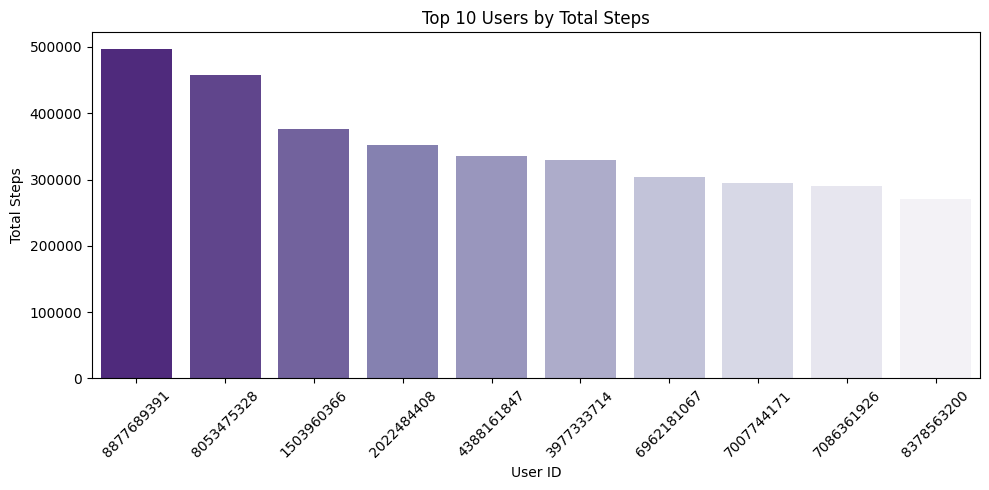

In [13]:
# Daily Steps Dataset
df = dataframes['dailySteps_merged']

# Convert ActivityDay to datetime
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

# Line Plot: Average Daily Steps Over Time
avg_steps = df.groupby('ActivityDay')['StepTotal'].mean()

plt.figure(figsize=(10, 5))
avg_steps.plot(color='purple')
plt.title('Average Daily Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Average Steps')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bar Chart: Top 10 Users by Total Steps
top_users = df.groupby('Id')['StepTotal'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_users.index.astype(str), y=top_users.values, palette='Purples_r')
plt.title('Top 10 Users by Total Steps')
plt.xlabel('User ID')
plt.ylabel('Total Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

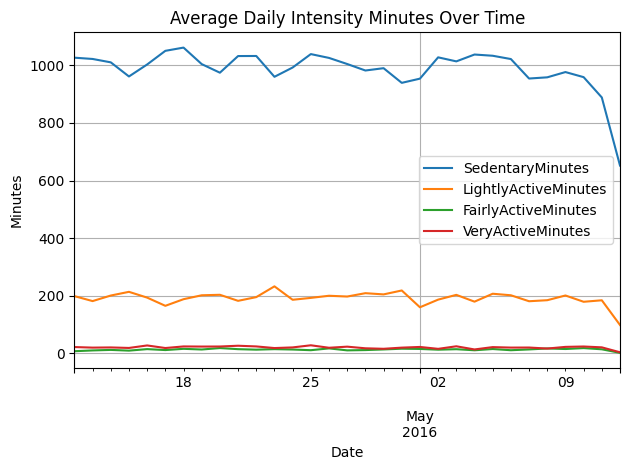

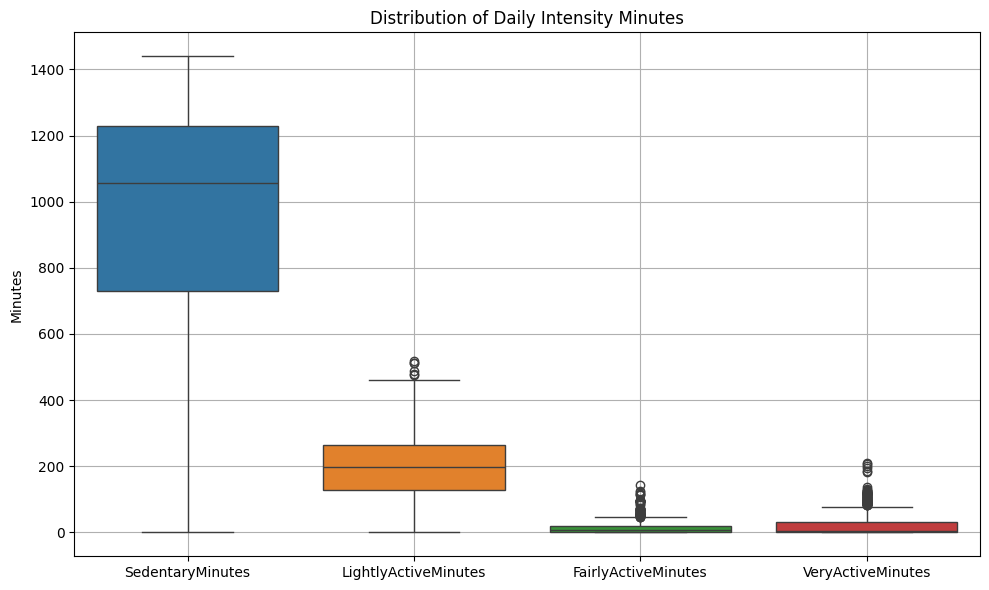

In [14]:
# Daily Intensities Dataset
df = dataframes['dailyIntensities_merged']

# Convert ActivityDay to datetime
df['ActivityDay'] = pd.to_datetime(df['ActivityDay'])

# Line Plot: Intensity Types Over Time (Average Across Users)
df_grouped = df.groupby('ActivityDay')[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']].mean()

plt.figure(figsize=(12, 6))
df_grouped.plot()
plt.title('Average Daily Intensity Minutes Over Time')
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box Plot: Distribution of Each Intensity Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes']])
plt.title('Distribution of Daily Intensity Minutes')
plt.ylabel('Minutes')
plt.grid(True)
plt.tight_layout()
plt.show()

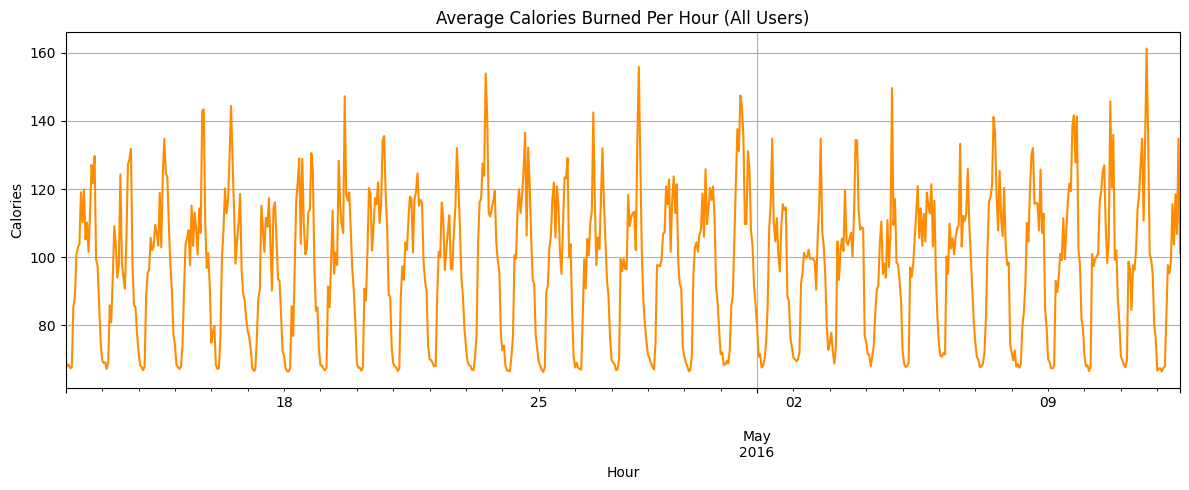

In [15]:
# Hourly Calories Dataset
df = dataframes['hourlyCalories_merged']

# Convert ActivityHour to datetime
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])

# Resample to get hourly average calories burned (across all users)
df.set_index('ActivityHour', inplace=True)
hourly_avg = df['Calories'].resample('H').mean()

plt.figure(figsize=(12, 5))
hourly_avg.plot(color='darkorange')
plt.title('Average Calories Burned Per Hour (All Users)')
plt.xlabel('Hour')
plt.ylabel('Calories')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x500 with 0 Axes>

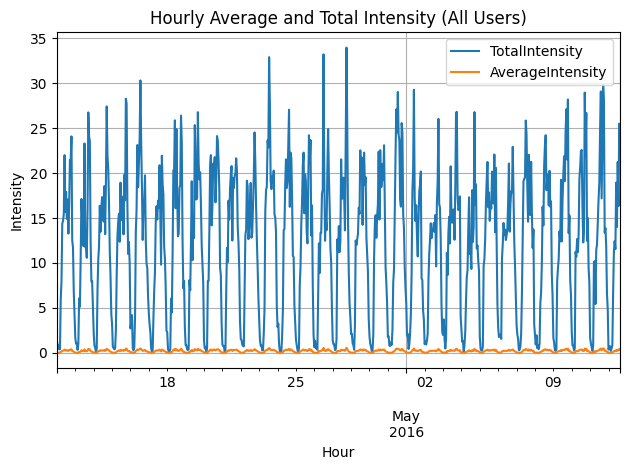

In [16]:
# Hourly Intensities Dataset
df = dataframes['hourlyIntensities_merged']

# Convert ActivityHour to datetime
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])

# Aggregate average intensity over time (per hour)
df.set_index('ActivityHour', inplace=True)
hourly_avg = df[['TotalIntensity', 'AverageIntensity']].resample('H').mean()

plt.figure(figsize=(12, 5))
hourly_avg.plot()
plt.title('Hourly Average and Total Intensity (All Users)')
plt.xlabel('Hour')
plt.ylabel('Intensity')
plt.grid(True)
plt.tight_layout()
plt.show()

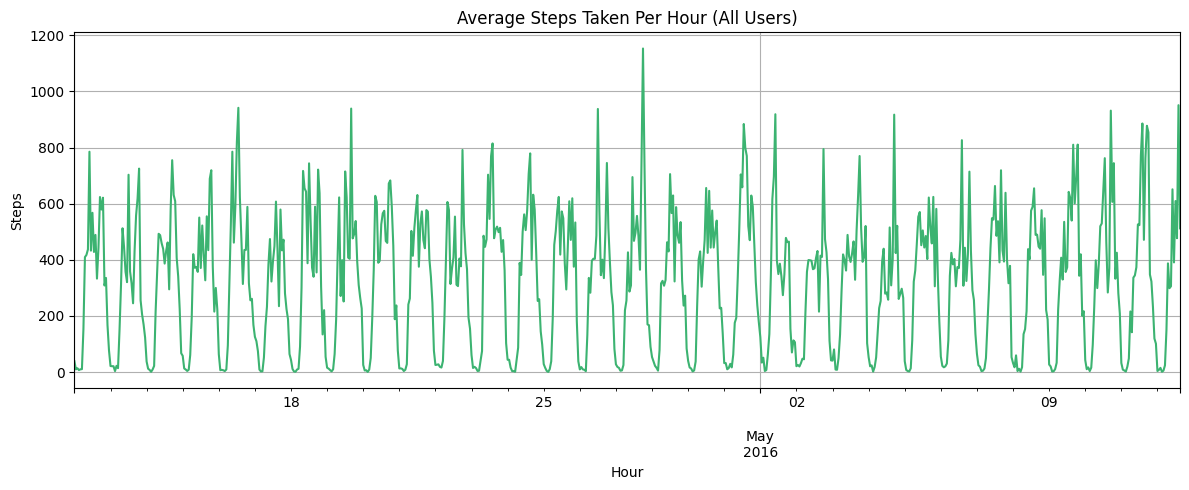

In [17]:
# Hourly Steps Dataset
df = dataframes['hourlySteps_merged']

# Convert ActivityHour to datetime
df['ActivityHour'] = pd.to_datetime(df['ActivityHour'])

# Set datetime index
df.set_index('ActivityHour', inplace=True)

# Line Plot: Hourly Average Steps Across All Users
hourly_avg_steps = df['StepTotal'].resample('H').mean()

plt.figure(figsize=(12, 5))
hourly_avg_steps.plot(color='mediumseagreen')
plt.title('Average Steps Taken Per Hour (All Users)')
plt.xlabel('Hour')
plt.ylabel('Steps')
plt.grid(True)
plt.tight_layout()
plt.show()